In [1]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

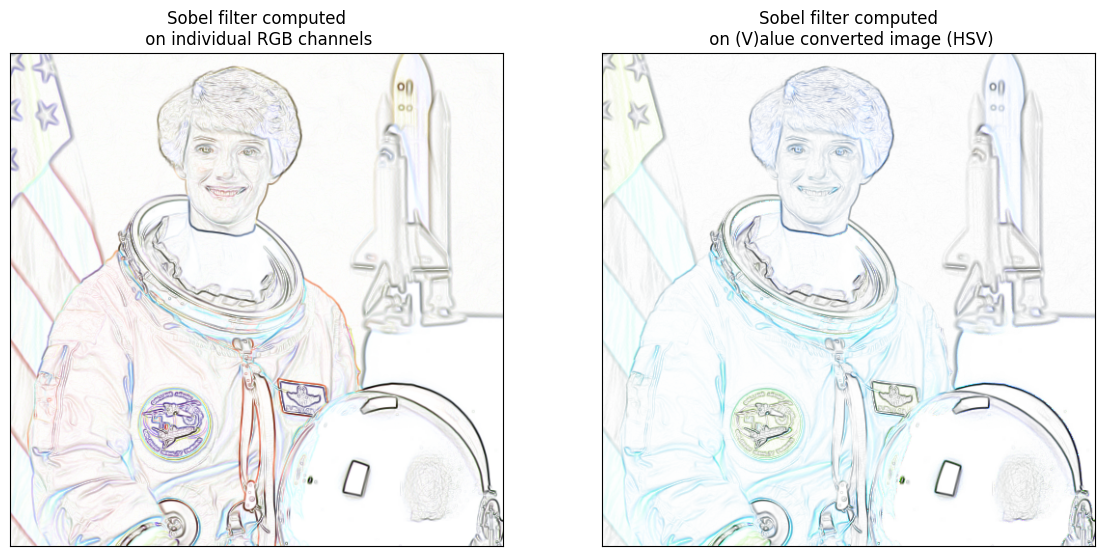

In [2]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

image = data.astronaut()

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")

In [3]:
def handler(image_filter, image, *args, **kwargs):
    # Manipulate RGB image here...
    image = image_filter(image, *args, **kwargs)
    # Manipulate filtered image here...
    return image

In [4]:
from skimage.color import rgb2gray


def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

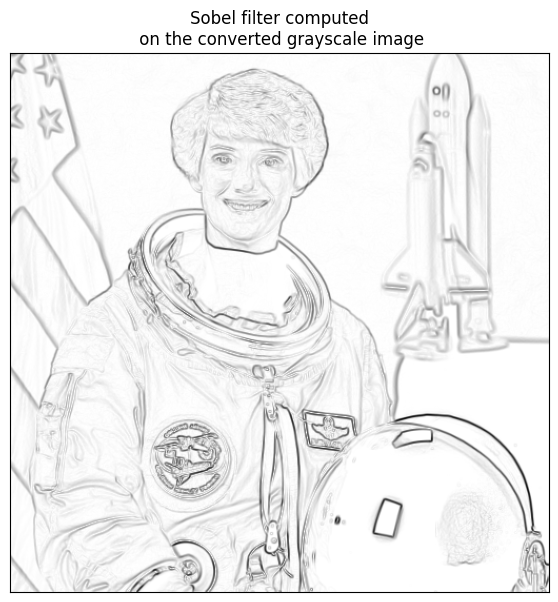

In [5]:
@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

# We use 1 - sobel_gray(image) but this won't work if image is not normalized
ax.imshow(rescale_intensity(1 - sobel_gray(image)), cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.set_title("Sobel filter computed\n on the converted grayscale image")

plt.show()